In [ ]:
#### purpose: PLOT MAXENT scores - Figures 6B and C
### input: output file from script 12 (get_5ss_3ss), outputs from block_exon_coordinates (script 3)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu



In [32]:
whip= pd.read_csv('whippet_CE_gene_name_exon_number_maxent.csv')

first_block_skip = pd.read_csv('first_block_exon.moreSKIPPED.csv')
middle_block_skip = pd.read_csv('middle_block_exon.moreSKIPPED.csv')
last_block_skip = pd.read_csv('last_block_exon.moreSKIPPED.csv')
single_reg_exons = pd.read_csv('other_regulated_exons.csv'))

sig_whip = pd.read_csv('sig_whip_CE_prob0.9_dPSI0.1.csv')

In [33]:
# Create copies of whip based on Coord matching
maxent_first_block_skip = whip[whip['Coord'].isin(first_block_skip['Coord'])].copy()
maxent_middle_block_skip = whip[whip['Coord'].isin(middle_block_skip['Coord'])].copy()
maxent_last_block_skip = whip[whip['Coord'].isin(last_block_skip['Coord'])].copy()

maxent_single_reg_exons = whip[whip['Coord'].isin(single_reg_exons['Coord'])].copy()
maxent_sig_whip = whip[whip['Coord'].isin(sig_whip['Coord'])].copy()

# Create maxent_non_reg: whip rows that are NOT in sig_whip
maxent_non_reg = whip[~whip['Coord'].isin(sig_whip['Coord'])].copy()


/var/folders/s5/012b_sqx2bl9vk20cyklfj_r0000gn/T/ipykernel_30769/551856146.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


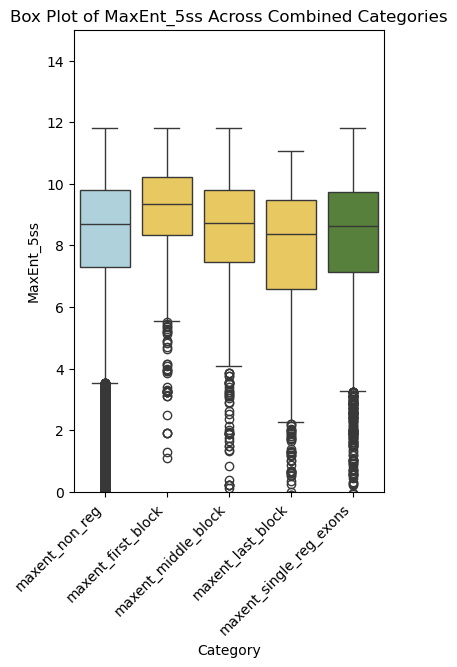

In [38]:
# Define the custom color mapping for combined categories
custom_colors = {
    "maxent_first_block": "#FFD449",  # Yellow
    "maxent_middle_block": "#FFD449",  # Yellow
    "maxent_last_block": "#FFD449",  # Yellow
    "maxent_single_reg_exons": "#548C2F",  # Green
    "maxent_non_reg": "#A8D5E2",  # Blue
}

# Combine first, middle, and last block categories
maxent_dataframes = {
    "maxent_non_reg": maxent_non_reg,
    "maxent_first_block": pd.concat([maxent_first_block_skip, maxent_first_block_incl], ignore_index=True),
    "maxent_middle_block": pd.concat([maxent_middle_block_skip, maxent_middle_block_incl], ignore_index=True),
    "maxent_last_block": pd.concat([maxent_last_block_skip, maxent_last_block_incl], ignore_index=True),
    "maxent_single_reg_exons": maxent_single_reg_exons
}

# Create a list to store the data for plotting
plot_data = []

# Populate the plot_data list
for name, df in maxent_dataframes.items():
    if "MaxEnt_5ss" in df.columns:
        for value in df["MaxEnt_5ss"]:
            plot_data.append({"Category": name, "MaxEnt_5ss": value})

# Convert the list to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Create the box plot
plt.figure(figsize=(4, 6))
sns.boxplot(
    x="Category",
    y="MaxEnt_5ss",
    data=plot_df,
    palette=[custom_colors[cat] for cat in plot_df["Category"].unique()]
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Add title and labels
plt.title("Box Plot of MaxEnt_5ss Across Combined Categories")
plt.ylim(0, 15)
plt.xlabel("Category")
plt.ylabel("MaxEnt_5ss")

plt.savefig('5ss_maxent_blocks.pdf')

# Show the plot
plt.show()


In [39]:
# Combine first, middle, and last block categories into single groups
maxent_combined = {
    "maxent_non_reg": maxent_non_reg,
    "maxent_first_block": pd.concat([maxent_first_block_skip, maxent_first_block_incl], ignore_index=True),
    "maxent_middle_block": pd.concat([maxent_middle_block_skip, maxent_middle_block_incl], ignore_index=True),
    "maxent_last_block": pd.concat([maxent_last_block_skip, maxent_last_block_incl], ignore_index=True),
    "maxent_single_reg_exons": maxent_single_reg_exons
}

# Store the MaxEnt_5ss values for each category in a dictionary
maxent_values = {
    name: df["MaxEnt_5ss"].dropna().values  # Drop NaN values if any
    for name, df in maxent_dataframes.items()
    if "MaxEnt_5ss" in df.columns
}

# List to store results
p_values = []

# Perform Mann-Whitney U test for each pair of categories
comparisons = list(combinations(maxent_values.keys(), 2))  # List of all category pairs
num_tests = len(comparisons)  # Number of tests for Bonferroni correction

for (cat1, cat2) in comparisons:
    data1 = maxent_values[cat1]
    data2 = maxent_values[cat2]

    if len(data1) > 0 and len(data2) > 0:  # Ensure both categories have data
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')

        # Apply Bonferroni correction
        p_corrected = min(p * num_tests, 1.0)  # Ensure p-value does not exceed 1

        p_values.append({
            "Category 1": cat1, 
            "Category 2": cat2, 
            "Raw p-value": p, 
            "Bonferroni-corrected p-value": p_corrected
        })

# Convert results into a DataFrame
p_values_df = pd.DataFrame(p_values)

# Print the results
print(p_values_df)



            Category 1               Category 2   Raw p-value  \
0       maxent_non_reg       maxent_first_block  3.961611e-38   
1       maxent_non_reg      maxent_middle_block  1.674492e-01   
2       maxent_non_reg        maxent_last_block  7.733920e-13   
3       maxent_non_reg  maxent_single_reg_exons  6.020860e-02   
4   maxent_first_block      maxent_middle_block  9.232566e-16   
5   maxent_first_block        maxent_last_block  1.253611e-43   
6   maxent_first_block  maxent_single_reg_exons  6.626894e-34   
7  maxent_middle_block        maxent_last_block  2.341751e-09   
8  maxent_middle_block  maxent_single_reg_exons  3.972161e-02   
9    maxent_last_block  maxent_single_reg_exons  5.551347e-08   

   Bonferroni-corrected p-value  
0                  3.961611e-37  
1                  1.000000e+00  
2                  7.733920e-12  
3                  6.020860e-01  
4                  9.232566e-15  
5                  1.253611e-42  
6                  6.626894e-33  
7           

/var/folders/s5/012b_sqx2bl9vk20cyklfj_r0000gn/T/ipykernel_30769/2736762169.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


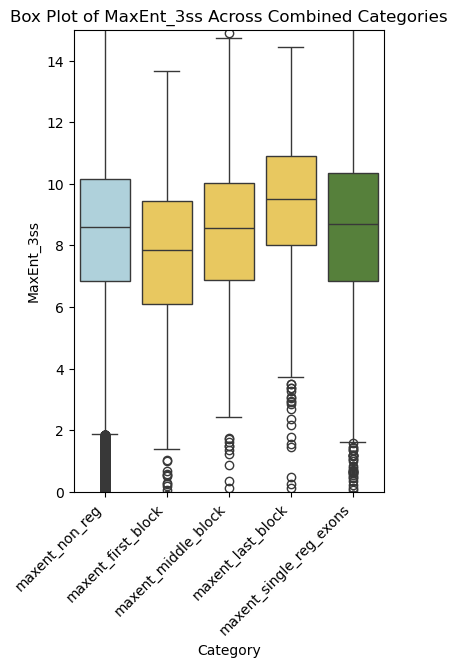

In [40]:
# Define the custom color mapping for combined categories
custom_colors = {
    "maxent_first_block": "#FFD449",  # Yellow
    "maxent_middle_block": "#FFD449",  # Yellow
    "maxent_last_block": "#FFD449",  # Yellow
    "maxent_single_reg_exons": "#548C2F",  # Green
    "maxent_non_reg": "#A8D5E2",  # Blue
}

# Combine first, middle, and last block categories
maxent_dataframes = {
    "maxent_non_reg": maxent_non_reg,
    "maxent_first_block": pd.concat([maxent_first_block_skip, maxent_first_block_incl], ignore_index=True),
    "maxent_middle_block": pd.concat([maxent_middle_block_skip, maxent_middle_block_incl], ignore_index=True),
    "maxent_last_block": pd.concat([maxent_last_block_skip, maxent_last_block_incl], ignore_index=True),
    "maxent_single_reg_exons": maxent_single_reg_exons
}

# Create a list to store the data for plotting
plot_data = []

# Populate the plot_data list
for name, df in maxent_dataframes.items():
    if "MaxEnt_3ss" in df.columns:
        for value in df["MaxEnt_3ss"]:
            plot_data.append({"Category": name, "MaxEnt_3ss": value})

# Convert the list to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Create the box plot
plt.figure(figsize=(4, 6))
sns.boxplot(
    x="Category",
    y="MaxEnt_3ss",
    data=plot_df,
    palette=[custom_colors[cat] for cat in plot_df["Category"].unique()]
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Add title and labels
plt.title("Box Plot of MaxEnt_3ss Across Combined Categories")
plt.ylim(0, 15)
plt.xlabel("Category")
plt.ylabel("MaxEnt_3ss")

plt.savefig('3ss_maxent_blocks.pdf')

# Show the plot
plt.show()


In [41]:
# Combine first, middle, and last block categories into single groups
maxent_combined = {
    "maxent_non_reg": maxent_non_reg,
    "maxent_first_block": pd.concat([maxent_first_block_skip, maxent_first_block_incl], ignore_index=True),
    "maxent_middle_block": pd.concat([maxent_middle_block_skip, maxent_middle_block_incl], ignore_index=True),
    "maxent_last_block": pd.concat([maxent_last_block_skip, maxent_last_block_incl], ignore_index=True),
    "maxent_single_reg_exons": maxent_single_reg_exons
}

## Store the MaxEnt_3ss values for each category in a dictionary
maxent_values = {
    name: df["MaxEnt_3ss"].dropna().values  # Drop NaN values if any
    for name, df in maxent_dataframes.items()
    if "MaxEnt_3ss" in df.columns
}

# List to store results
p_values = []

# Perform Mann-Whitney U test for each pair of categories
comparisons = list(combinations(maxent_values.keys(), 2))  # List of all category pairs
num_tests = len(comparisons)  # Number of tests for Bonferroni correction

for (cat1, cat2) in comparisons:
    data1 = maxent_values[cat1]
    data2 = maxent_values[cat2]

    if len(data1) > 0 and len(data2) > 0:  # Ensure both categories have data
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')

        # Apply Bonferroni correction
        p_corrected = min(p * num_tests, 1.0)  # Ensure p-value does not exceed 1

        p_values.append({
            "Category 1": cat1, 
            "Category 2": cat2, 
            "Raw p-value": p, 
            "Bonferroni-corrected p-value": p_corrected
        })

# Convert results into a DataFrame
p_values_df = pd.DataFrame(p_values)

# Print the results
print(p_values_df)




            Category 1               Category 2   Raw p-value  \
0       maxent_non_reg       maxent_first_block  6.784346e-21   
1       maxent_non_reg      maxent_middle_block  8.346473e-01   
2       maxent_non_reg        maxent_last_block  9.466944e-37   
3       maxent_non_reg  maxent_single_reg_exons  1.573194e-02   
4   maxent_first_block      maxent_middle_block  7.065920e-11   
5   maxent_first_block        maxent_last_block  1.355402e-54   
6   maxent_first_block  maxent_single_reg_exons  2.068441e-20   
7  maxent_middle_block        maxent_last_block  6.352468e-20   
8  maxent_middle_block  maxent_single_reg_exons  1.981270e-01   
9    maxent_last_block  maxent_single_reg_exons  9.284662e-23   

   Bonferroni-corrected p-value  
0                  6.784346e-20  
1                  1.000000e+00  
2                  9.466944e-36  
3                  1.573194e-01  
4                  7.065920e-10  
5                  1.355402e-53  
6                  2.068441e-19  
7           